<a href="https://colab.research.google.com/github/Aminfaraji/segmentaion_document_Unet/blob/main/document%20segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import glob
import nibabel
import matplotlib.pyplot as plt
from skimage.util import montage
import os
from keras.preprocessing.image import load_img,img_to_array
import keras as K

In [ ]:
# !pip install -q kaggle
# !mkdir ~/.kaggle 
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c ultrasound-nerve-segmentation

In [3]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00306/dataset_segmentation.rar
# !unrar x /content/dataset_segmentation.rar

In [23]:
images=glob.glob("/content/dataset_segmentation/*.jpg")
mask=glob.glob("/content/dataset_segmentation/*.png")
train_image=[]
train_mask=[]
for i in range(len(images)):
  img=load_img(images[i],target_size=(256,256),grayscale=False)
  mask_=load_img(images[i][:-4]+"_m.png",target_size=(256,256),grayscale=False)
  train_image.append(img_to_array(img))
  train_mask.append(img_to_array(mask_))
  # print(images[i],"+++++",images[i][:-4]+"_m.png")
train_image=np.array(train_image)
train_mask=np.array(train_mask)

In [63]:
input_=K.Input((256,256,3))
conv1=K.layers.Conv2D(32,3,activation='relu',padding='same')(input_)
conv1=K.layers.BatchNormalization(momentum=.8)(conv1)
conv1=K.layers.Conv2D(32,3,activation='relu',padding='same')(conv1)
pool1=K.layers.MaxPool2D()(conv1)

conv2=K.layers.Conv2D(64,3,activation='relu',padding='same')(pool1)
conv2=K.layers.BatchNormalization(momentum=.8)(conv2)
conv2=K.layers.Conv2D(64,3,activation='relu',padding='same')(conv2)
pool2=K.layers.MaxPool2D()(conv2)

conv3=K.layers.Conv2D(128,3,activation='relu',padding='same')(pool2)
conv3=K.layers.Conv2D(128,3,activation='relu',padding='same')(conv3)
pool3=K.layers.MaxPool2D()(conv3)

conv4=K.layers.Conv2D(256,3,activation='relu',padding='same')(pool3)
conv4=K.layers.BatchNormalization(momentum=.8)(conv4)
conv4=K.layers.Conv2D(256,3,activation='relu',padding='same')(conv4)
pool4=K.layers.MaxPool2D()(conv4)

conv5=K.layers.Conv2D(512,3,activation='relu',padding='same')(pool4)
conv5=K.layers.Conv2D(512,3,activation='relu',padding='same')(conv5)
pool5=K.layers.MaxPool2D()(conv5)

u6=K.layers.concatenate([K.layers.Conv2DTranspose(256,(2,2),(2,2),padding="same")(conv5),conv4],axis=3)
conv6=K.layers.Conv2D(256,3,activation="relu",padding="same")(u6)
conv6=K.layers.Conv2D(256,3,activation="relu",padding="same")(conv6)

u7=K.layers.concatenate([K.layers.Conv2DTranspose(128,2,(2,2),padding="same")(conv6),conv3],axis=3)
conv7=K.layers.Conv2D(128,3,activation="relu",padding="same")(u7)
conv7=K.layers.BatchNormalization(momentum=.8)(conv7)
conv7=K.layers.Conv2D(128,3,activation="relu",padding="same")(conv7)

u8=K.layers.concatenate([K.layers.Conv2DTranspose(64,2,(2,2),padding="same")(conv7),conv2],axis=3)
conv8=K.layers.Conv2D(64,3,activation="relu",padding="same")(u8)
conv8=K.layers.Conv2D(64,3,activation="relu",padding="same")(conv8)


u9=K.layers.concatenate([K.layers.Conv2DTranspose(32,2,(2,2),padding="same")(conv8),conv1],axis=3)
conv9=K.layers.Conv2D(32,3,activation="relu",padding="same")(u9)
conv9=K.layers.BatchNormalization(momentum=.8)(conv9)
conv9=K.layers.Conv2D(32,3,activation="relu",padding="same")(conv9)

conv10=K.layers.Conv2D(3,1,activation="softmax",padding="same")(conv9)

model=K.Model([input_],[conv10])


In [7]:
# model.summary()

In [66]:
# def jucard(y_true,y_pred):
#   y_true_f=K.backend.flatten(y_true)
#   y_pred_f=K.backend.flatten(y_pred)
#   intersection=K.backend.sum(y_true_f*y_pred_f)
#   return (2*intersection+1)/(K.backend.flatten(y_pred_f)+K.backend.flatten(y_true_f)+1)
# def acc(y_true,y_pred):
#   return jucard(y_true,y_pred)
model.compile(K.optimizers.Adam(1e-5),loss=K.losses.categorical_crossentropy,metrics=["acc"])

In [67]:
model.fit(train_image,train_mask,batch_size=16,epochs=400)

Epoch 1/400
5/5 [==============================] - 2s 142ms/step - loss: 513.9476 - acc: 0.2162
Epoch 2/400
5/5 [==============================] - 1s 142ms/step - loss: 497.4449 - acc: 0.2303
Epoch 3/400
5/5 [==============================] - 1s 141ms/step - loss: 501.2059 - acc: 0.2346
Epoch 4/400
5/5 [==============================] - 1s 142ms/step - loss: 508.4778 - acc: 0.2398
Epoch 5/400
5/5 [==============================] - 1s 142ms/step - loss: 508.8676 - acc: 0.2368
Epoch 6/400
5/5 [==============================] - 1s 142ms/step - loss: 504.7927 - acc: 0.2410
Epoch 7/400
5/5 [==============================] - 1s 142ms/step - loss: 500.5931 - acc: 0.2432
Epoch 8/400
5/5 [==============================] - 1s 142ms/step - loss: 504.0741 - acc: 0.2437
Epoch 9/400
5/5 [==============================] - 1s 142ms/step - loss: 492.4584 - acc: 0.2565
Epoch 10/400
5/5 [==============================] - 1s 142ms/step - loss: 499.6083 - acc: 0.2494
Epoch 11/400
5/5 [=====================

In [68]:
img=load_img("/content/Screenshot from 2020-12-30 22-57-40.png",target_size=(256,256))
img=img_to_array(img).reshape((1,256,256,3))
img_pred=model.predict(img)

(<matplotlib.image.AxesImage at 0x7f21b0f6b2e8>,
 <matplotlib.image.AxesImage at 0x7f21b0f9cd68>)

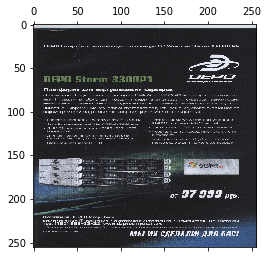

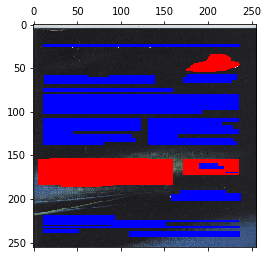

In [53]:
plt.matshow(train_image[20]/255),plt.matshow(train_mask[20]/255)

(<matplotlib.image.AxesImage at 0x7f21ac02ae48>,
 <matplotlib.image.AxesImage at 0x7f21abfe1860>)

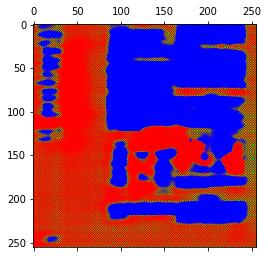

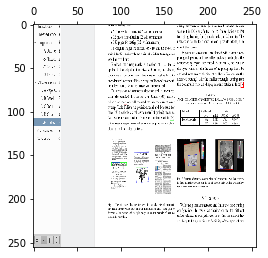

In [69]:
plt.matshow(img_pred[0]),plt.matshow(img.reshape((256,256,3))/255)